In [1]:
import re
import nltk
import spacy
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

ps = PorterStemmer()
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Loading the Dataset

In [10]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

true['fake'] = 0
fake['fake'] = 1

df = pd.concat([true, fake], ignore_index=True)

df = df.drop(columns=['date', 'subject', 'text'])

df = df.sample(frac=1)

print(df.head())


titles = np.array(df['title'])

                                                   title  fake
821    Trump backs New York in bourses' battle for Sa...     0
9923   Congress should give Puerto Rico debt restruct...     0
19771  Norwegian policeman jailed for 21 years in dru...     0
24758   GOP Rep’s Replacement For Obamacare Is Child ...     1
38703  HELL-BENT ON A CONVICTION: Is The Pentagon’s T...     1


# 2. Data Preprocessing

In [11]:
corpus = []

for i in tqdm(range(len(titles))):
  news = re.sub(r'^a-zA-Z', '', titles[i])
  news = word_tokenize(news.lower())
  news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
  news = nlp(news).vector
  corpus.append(news)

X = np.array(corpus)

X_train = X[:40000]
y_train = df['fake'][:40000]
X_test  = X[40000:]

100%|████████████████████████████████████████████████████████████████████████████| 44898/44898 [08:44<00:00, 85.57it/s]


# 3. Training the Classifier

In [12]:
classifier = LogisticRegression(random_state = 1, max_iter = 50)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=50, random_state=1)

# 4. Model Evaluation

[[2238  108]
 [ 198 2354]]
Accuracy :  93.75


<Axes: >

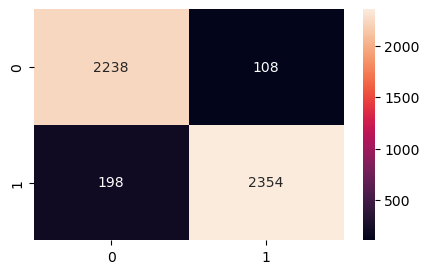

In [13]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy : ' , round(accuracy_score(y_test,y_pred)*100,2))

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot = True, fmt = 'd')